# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

### **Dependencies**

In [1]:
#*******************************************************************************************
 #
 #  File Name:  Pymaceuticals.ipynb
 #
 #  File Description:
 #      This interactive Python notebook, Pymaceuticals.ipynb, reads two csv files,
 #      Mouse_metadata.csv and Study_results.csv, in the Resources folder, which 
 #      contain data about a pharmaceutical company's most recent animal study. 
 #      In this study, two hundred forty-nine mice, who were identified with SCC 
 #      tumors, received treatment with a range of drug regimens. Over the course 
 #      of 45 days, tumor development was observed and measured. The purpose of 
 #      this study was to compare the performance of Pymaceuticals’ drug of interest, 
 #      Capomulin, against the other treatment regimens.  This Python script generates 
 #      all of the tables and figures needed for a technical report of this clinical 
 #      study.
 #
 #
 #  Date            Description                             Programmer
 #  ----------      ------------------------------------    ------------------
 #  08/18/2023      Initial Development                     Nicholas George
 #
 #******************************************************************************************/

import PymaceuticalsFunctions as local_function
import PymaceuticalsSubRoutines as local_subroutine

import PyConstants as constant
import PyFunctions as function
import PySubroutines as subroutine

import numpy as np
import pandas as pd

### **Local Constants**

In [2]:
CONSTANT_LOCAL_FILE_NAME \
    = 'Pymaceuticals.ipynb'


CONSTANT_MOUSE_INFO_CSV_FILE_PATH \
    = './Resources/MouseMetaData.csv'

CONSTANT_MEDICAL_STUDY_CSV_FILE_PATH \
    = './Resources/StudyResults.csv'

# <br> **Section 1: Data Preparation**

### **Read CSV Files into DataFrames**

In [3]:
mouseInfoDataFrame \
    = function. \
        ReturnCSVFileAsDataFrame \
            (CONSTANT_MOUSE_INFO_CSV_FILE_PATH)


function \
    .DebugReturnObject \
        (mouseInfoDataFrame)

In [4]:
medicalStudyDataFrame \
    = function. \
        ReturnCSVFileAsDataFrame \
            (CONSTANT_MEDICAL_STUDY_CSV_FILE_PATH)

function \
    .DebugReturnObject \
        (medicalStudyDataFrame)

###  **Merge DataFrames**

In [5]:
completeMedicalStudyDataFrame \
    = function \
        .ReturnMergedDataFrame \
            (mouseInfoDataFrame,
             medicalStudyDataFrame,
             'left',
             'Mouse ID')


function \
    .DebugReturnObject \
        (completeMedicalStudyDataFrame)

### **Display Merged DataFrame Subset**

In [6]:
local_function \
    .ReturnFormattedCompleteMedicalStudyStylerObject \
        (function \
             .ReturnStylerObjectStandardFormat \
                (completeMedicalStudyDataFrame.head(), ''),
         'Table 1.1: Complete Medical Study Data')

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
k403,Ramicane,Male,21,16.00,0,45.00,0
k403,Ramicane,Male,21,16.00,5,38.83,0
k403,Ramicane,Male,21,16.00,10,35.01,1
k403,Ramicane,Male,21,16.00,15,34.22,1
k403,Ramicane,Male,21,16.00,20,33.00,1


### **Display the Number of Unique Mouse IDs in the Data**

In [7]:
numberOfUniqueMouseIDsIntegerVariable \
    = function \
        .ReturnNumberOfUniqueElementsInColumn \
            (completeMedicalStudyDataFrame, 
             'Mouse ID')

print \
    (f'The number of unique mouse IDs in the complete medical study DataFrame is ' \
     + f"{numberOfUniqueMouseIDsIntegerVariable}.")

The number of unique mouse IDs in the complete medical study DataFrame is 249.


### **Check for Any Mouse ID with Duplicate Time Points**

In [8]:
duplicateMouseIDDataFrame \
    = function \
        .ReturnDuplicateRowsAsDataFrame \
            (completeMedicalStudyDataFrame,
             ['Mouse ID', 'Timepoint'])


function \
    .DebugReturnObject \
        (duplicateMouseIDDataFrame)

### **Display the Data Associated With that Mouse ID**

In [9]:
local_function \
    .ReturnFormattedCompleteMedicalStudyStylerObject \
        (function \
             .ReturnStylerObjectStandardFormat \
                (duplicateMouseIDDataFrame, ''),
         'Table 1.2: Duplicate Mouse IDs and Timepoints in Complete Medical Study')

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
g989,Propriva,Female,21,26.00,0,45.00,0
g989,Propriva,Female,21,26.00,5,47.57,0
g989,Propriva,Female,21,26.00,10,49.88,0
g989,Propriva,Female,21,26.00,15,53.44,0
g989,Propriva,Female,21,26.00,20,54.66,1


In [10]:
duplicateMouseIDsList \
    = duplicateMouseIDDataFrame \
        ['Mouse ID'] \
            .unique() \
                .tolist()


function \
    .DebugReturnObject \
        (duplicateMouseIDsList)

In [11]:
local_function \
    .ReturnFormattedCompleteMedicalStudyStylerObject \
        (function \
             .ReturnStylerObjectStandardFormat \
                (function \
                     .ReturnDataFrameRowsWithValue \
                         (completeMedicalStudyDataFrame, 
                          'Mouse ID', 
                          duplicateMouseIDsList), 
                 ''),
         'Table 1.3: Rows with Duplicate Mouse IDs in Complete Medical Study')

Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
g989,Propriva,Female,21,26.00,0,45.00,0
g989,Propriva,Female,21,26.00,0,45.00,0
g989,Propriva,Female,21,26.00,5,48.79,0
g989,Propriva,Female,21,26.00,5,47.57,0
g989,Propriva,Female,21,26.00,10,51.75,0
g989,Propriva,Female,21,26.00,10,49.88,0
g989,Propriva,Female,21,26.00,15,51.33,1
g989,Propriva,Female,21,26.00,15,53.44,0
g989,Propriva,Female,21,26.00,20,55.33,1
g989,Propriva,Female,21,26.00,20,54.66,1


### **Create New Complete Medical Study DataFrame Without Duplicate Mouse IDs**

In [12]:
cleanCompleteMedicalStudyDataFrame \
    = function \
        .ReturnDataFrameRowsWithoutValue \
            (completeMedicalStudyDataFrame, 
                'Mouse ID', 
                duplicateMouseIDsList)


function \
    .DebugReturnObject \
        (cleanCompleteMedicalStudyDataFrame)

### **Display the Updated Number of Unique Mouse IDs**

In [13]:
updatedNumberOfUniqueMouseIDsIntegerVariable \
    = function \
        .ReturnNumberOfUniqueElementsInColumn \
            (cleanCompleteMedicalStudyDataFrame, 
             'Mouse ID')

print \
    (f'The updated number of unique mouse IDs in the complete medical study DataFrame is ' \
     + f"{updatedNumberOfUniqueMouseIDsIntegerVariable}.")

The updated number of unique mouse IDs in the complete medical study DataFrame is 248.


# <br> **Section 2: Summary Statistics**

### **New Medical Study DataFrame Grouped by Drug Regimen**

In [14]:
completeMedicalStudyGroupedByRegimenDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .groupby \
            ('Drug Regimen')

### **Tumor Volume (Mean)**

In [15]:
meanTumorVolumeSeries \
    = completeMedicalStudyGroupedByRegimenDataFrame \
            ['Tumor Volume (mm3)'] \
            .mean()


function \
    .DebugReturnObject \
        (meanTumorVolumeSeries)

### **Tumor Volume (Median)**

In [16]:
medianTumorVolumeSeries \
    = completeMedicalStudyGroupedByRegimenDataFrame \
            ['Tumor Volume (mm3)'] \
            .median()


function \
    .DebugReturnObject \
        (medianTumorVolumeSeries)

### **Tumor Volume (Variance)**

In [17]:
varianceTumorVolumeSeries \
    = completeMedicalStudyGroupedByRegimenDataFrame \
            ['Tumor Volume (mm3)'] \
            .var()


function \
    .DebugReturnObject \
        (varianceTumorVolumeSeries)

### **Tumor Volume (Standard Deviation)**

In [18]:
standardTumorVolumeSeries \
    = completeMedicalStudyGroupedByRegimenDataFrame \
            ['Tumor Volume (mm3)'] \
            .std()


function \
    .DebugReturnObject \
        (standardTumorVolumeSeries)

### **Tumor Volume (Standard Errror of the Mean)**

In [19]:
standardErrorOfTheMeanTumorVolumeSeries \
    = completeMedicalStudyGroupedByRegimenDataFrame \
            ['Tumor Volume (mm3)'] \
            .sem()


function \
    .DebugReturnObject \
        (standardErrorOfTheMeanTumorVolumeSeries)

### **Summary Statistics DataFrame**

In [20]:
summaryStatisticsDataFrame \
    = pd \
        .DataFrame({
            'Mean':
                meanTumorVolumeSeries,
            'Median':
                medianTumorVolumeSeries,
            'Variance':
                varianceTumorVolumeSeries,
            'Standard Deviation':
                standardTumorVolumeSeries,
            'Standard Error of the Mean':
                standardErrorOfTheMeanTumorVolumeSeries})


function \
    .DebugReturnObject \
        (summaryStatisticsDataFrame)

### **Display Summary Statistics**

In [21]:
function \
    .ReturnStylerObjectBackgroundGradientFormat \
        (summaryStatisticsDataFrame, 
         'Table 2.0: Summary Statistics (Tumor Volume)')

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


# <br> **Section 3: Bar Charts and Pie Charts**

### **Prepare Series and Format for Bar Charts**

In [22]:
countByDrugRegimenSeries \
    = cleanCompleteMedicalStudyDataFrame \
            ['Drug Regimen'] \
      .value_counts()


function \
    .DebugReturnObject \
        (countByDrugRegimenSeries)

In [23]:
barColorsList \
    = ['red',
       'blue', 
       'blue', 
       'blue', 
       'blue', 
       'blue', 
       'blue', 
       'blue', 
       'blue', 
       'blue']

### **Bar Chart With the Pandas Method**

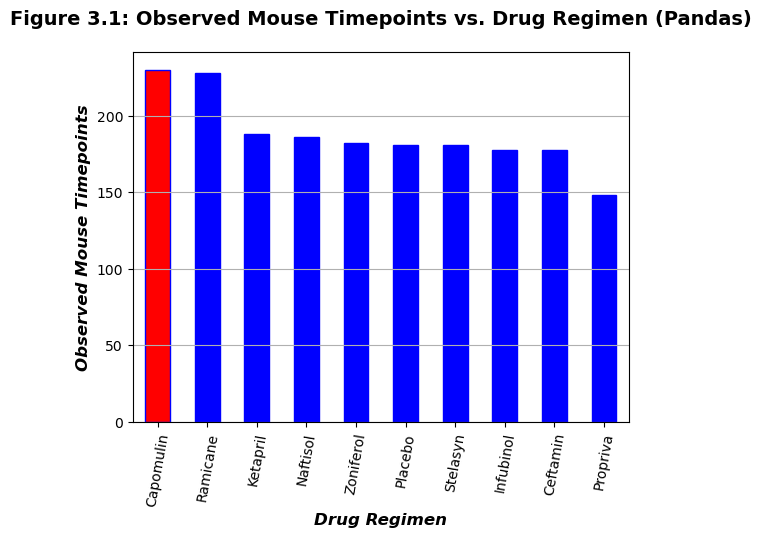

In [24]:
subroutine \
    .DisplayPandasBarChartFromSeries \
        (countByDrugRegimenSeries, 
         barColorsList,
         'Figure 3.1: Observed Mouse Timepoints vs. Drug Regimen (Pandas)',
         'Observed Mouse Timepoints')

### **Bar Chart With the Matplotlib Method**

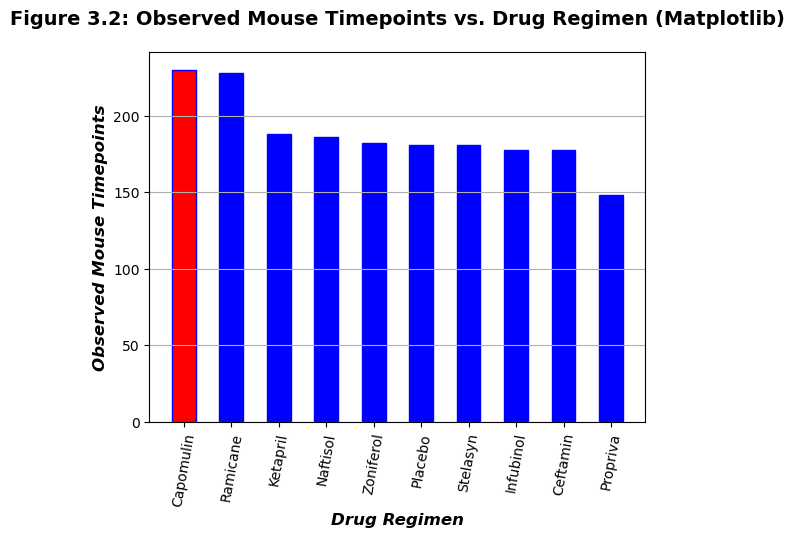

In [25]:
subroutine \
    .DisplayMatplotlibBarChartFromSeries \
        (countByDrugRegimenSeries, 
         barColorsList,
         'Figure 3.2: Observed Mouse Timepoints vs. Drug Regimen (Matplotlib)',
         'Observed Mouse Timepoints')

### **Prepare Series and Format for Pie Charts**

In [26]:
mouseCountByGenderSeries \
    = cleanCompleteMedicalStudyDataFrame \
            ['Sex'] \
            .value_counts()


function \
    .DebugReturnObject \
        (mouseCountByGenderSeries)

In [27]:
pieColorsList \
    = ['deepskyblue',
       'pink']

explodeTuple \
    = (0.02,
       0.02)

### **Pie Chart With the Pandas Method**

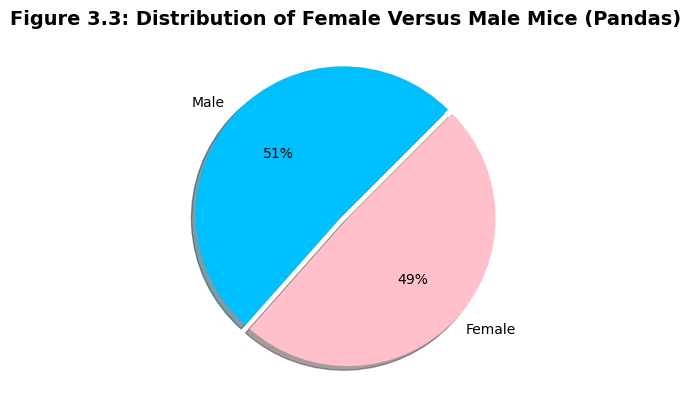

In [28]:
subroutine \
    .DisplayPandasPieChartFromSeries \
        (mouseCountByGenderSeries, 
         pieColorsList,
         explodeTuple,
         'Figure 3.3: Distribution of Female Versus Male Mice (Pandas)')

### **Pie Chart With the Matplotlib Method**

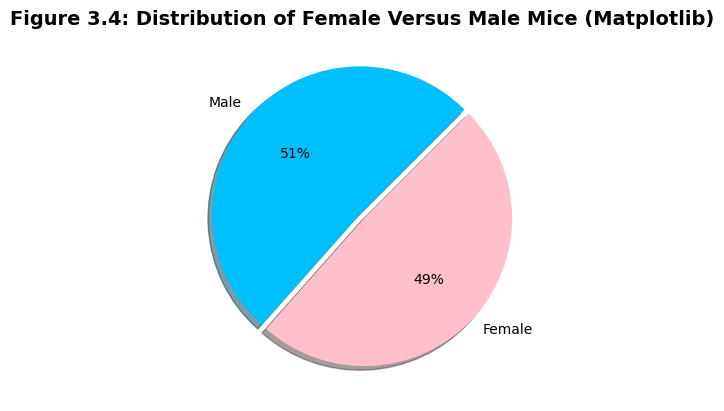

In [29]:
subroutine \
    .DisplayMatplotlibPieChartFromSeries \
        (mouseCountByGenderSeries, 
         pieColorsList,
         explodeTuple,
         'Figure 3.4: Distribution of Female Versus Male Mice (Matplotlib)')

# <br> **Section 4: Quartiles, Outliers, and Box Plots**

### **The Last (Greatest) Timepoint for Each Mouse**

In [30]:
# This line of code takes only rows for the four most promising treatment 
# regimens and placebos and assigns the data to a DataFrame.
promisingTreatmentRegimensDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
        .loc \
            [(cleanCompleteMedicalStudyDataFrame['Drug Regimen'] == 'Capomulin')|
             (cleanCompleteMedicalStudyDataFrame['Drug Regimen'] == 'Ramicane')|
             (cleanCompleteMedicalStudyDataFrame['Drug Regimen'] == 'Infubinol')|
             (cleanCompleteMedicalStudyDataFrame['Drug Regimen'] == 'Ceftamin')|
             (cleanCompleteMedicalStudyDataFrame['Drug Regimen'] == 'Placebo'), :]

function \
    .DebugReturnObject \
        (promisingTreatmentRegimensDataFrame)

In [31]:
# This line of code uses groupby to group the rows by the last (greatest) timepoint 
# for each mouse ID, retrieves the maximum timepoint for each mouse, and resets 
# the DataFrame's index.
maximumTimepointPerMouseDataFrame \
    = promisingTreatmentRegimensDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Timepoint'] \
        .max() \
        .reset_index()


function \
    .DebugReturnObject \
        (maximumTimepointPerMouseDataFrame)

### **New Merged DataFrame Has the Tumor Volume at the Last Timepoint**

In [32]:
mergedCompleteMedicalStudyDataFrame \
    = pd \
        .merge \
            (maximumTimepointPerMouseDataFrame,
             cleanCompleteMedicalStudyDataFrame, 
             on \
                 = ['Mouse ID',
                    'Timepoint'],
                    how \
                        = 'left')


function \
    .DebugReturnObject \
        (mergedCompleteMedicalStudyDataFrame)

In [33]:
# In debug mode, these lines of code check if the mouse IDs in the merged
# complete medical study DataFrame are the same as those in the maximum 
# timepoint per mouse DataFrame.
if constant.CONSTANT_DEBUG_FLAG == True:
    
    uniqueMouseIDsMergedStudyArray \
        = mergedCompleteMedicalStudyDataFrame \
            ['Mouse ID'] \
            .unique()
    
    uniqueMouseIDsMaximumTimePointArray \
        = maximumTimepointPerMouseDataFrame \
            ['Mouse ID'] \
            .unique()
    
    print \
        (np \
            .array_equal \
                (uniqueMouseIDsMergedStudyArray, 
                 uniqueMouseIDsMaximumTimePointArray))

### **Most Promising Drug Regimen List and Tumor Volume Data List**

In [34]:
tumorVolumeSeriesList \
    = []

mostPromisingDrugRegimenNamesList \
    = promisingTreatmentRegimensDataFrame \
        ['Drug Regimen'] \
         .sort_values \
            (ascending \
                = True) \
         .unique() \
         .tolist()


function \
    .DebugReturnObject \
        (mostPromisingDrugRegimenNamesList)

### **Populate Tumor Volume Data List**

In [35]:
# This for loop cycles through the List of drug regimens, extracts the 
# tumor volume for each regimen as a Series, and appends the series to 
# a List.
for regimenName in mostPromisingDrugRegimenNamesList:

    regimenStudyDataFrame \
        = mergedCompleteMedicalStudyDataFrame \
            .loc \
                [(mergedCompleteMedicalStudyDataFrame \
                      ['Drug Regimen']
                  == regimenName), :]

    tumorVolumeSeriesList \
        .append \
            (regimenStudyDataFrame \
                 ['Tumor Volume (mm3)'])


function \
    .DebugReturnObject \
        (tumorVolumeSeriesList)

### **Display Tumor Volume Statistics**

In [36]:
local_subroutine \
    .DisplayTumorVolumeStatistics \
        (mostPromisingDrugRegimenNamesList, 
         tumorVolumeSeriesList)

Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
32.38,40.16,7.78,38.13,20.70,51.83,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
48.72,64.30,15.58,59.85,25.36,87.67,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
54.05,65.53,11.48,60.17,36.83,82.74,1


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
52.94,68.13,15.19,62.03,30.16,90.92,0


Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Boundary,Upper Boundary,Number of Outliers
31.56,40.66,9.10,36.56,17.91,54.31,0


### **Display Tumor Volume Statistics Box Plot**

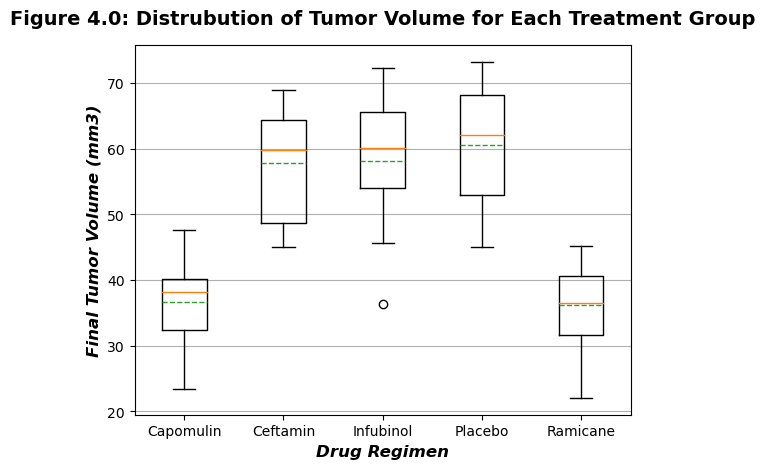

In [37]:
subroutine \
    .DisplayMatplotlibBoxPlotFromSeriesList \
        (tumorVolumeSeriesList,
         mostPromisingDrugRegimenNamesList,
         'Drug Regimen',
         'Final Tumor Volume (mm3)',
         'Figure 4.0: Distrubution of Tumor Volume for Each Treatment Group')

 # <br> **Section 5: Line Plot and Scatter Plot**

### **Capomulin Study Data**

In [38]:
# This line of code extracts all rows from the clean medical study DataFrame 
# for the drug regimen, Capomulin.
capomulinStudyDataFrame \
    = cleanCompleteMedicalStudyDataFrame \
            .loc \
                [(cleanCompleteMedicalStudyDataFrame \
                    ['Drug Regimen'] 
                        == 'Capomulin'), :]


function \
    .DebugReturnObject \
        (capomulinStudyDataFrame)

### **Random Mouse ID Selection**

In [39]:
randomMouseIDStringVariable \
    = capomulinStudyDataFrame \
        .sample \
            (n = 1, 
             replace = False) \
        .iloc \
            [0, 0]


function \
    .DebugReturnObject \
        (randomMouseIDStringVariable)

### **Mouse Data Retrieval**

In [40]:
capomulinSingleMouseDataFrame \
    = capomulinStudyDataFrame\
        .loc \
            [(capomulinStudyDataFrame \
                  ['Mouse ID'] 
              == randomMouseIDStringVariable), :]


function \
    .DebugReturnObject \
        (capomulinSingleMouseDataFrame)

### **Line Calculations**

In [41]:
capomulinXValuesSeries \
    = capomulinSingleMouseDataFrame \
        ['Timepoint']


function \
    .DebugReturnObject \
        (capomulinXValuesSeries)

In [42]:
capomulinYValuesSeries \
    = capomulinSingleMouseDataFrame \
        ['Tumor Volume (mm3)']


function \
    .DebugReturnObject \
        (capomulinYValuesSeries)

### **Display Line Plot**

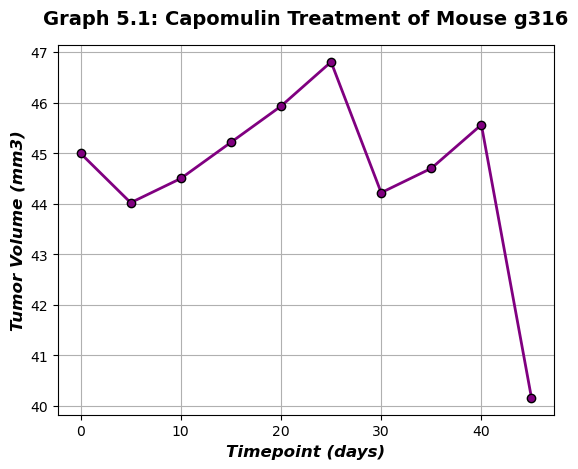

In [43]:
titleStringVariable \
    = f'Graph 5.1: Capomulin Treatment of Mouse {randomMouseIDStringVariable}'

subroutine \
    .DisplayMatplotlibLineChartFromXYSeries \
        (capomulinXValuesSeries,
         capomulinYValuesSeries,
         'purple',
         'solid',
         'Timepoint (days)',
         'Tumor Volume (mm3)',
         titleStringVariable)

### **Mean of Tumor Volumes Per Mouse ID**

In [44]:
capomulinMeanTumorVolumePerMouseSeries \
    = capomulinStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Tumor Volume (mm3)'] \
        .mean()


function \
    .DebugReturnObject \
        (capomulinMeanTumorVolumePerMouseSeries)

### **Mean of Weights Per Mouse ID**

In [45]:
capomulinMeanWeightPerMouseSeries \
    = capomulinStudyDataFrame \
        .groupby \
            ('Mouse ID') \
                ['Weight (g)'] \
            .mean()


function \
    .DebugReturnObject \
        (capomulinMeanWeightPerMouseSeries)

### **Display Scatter Plot**

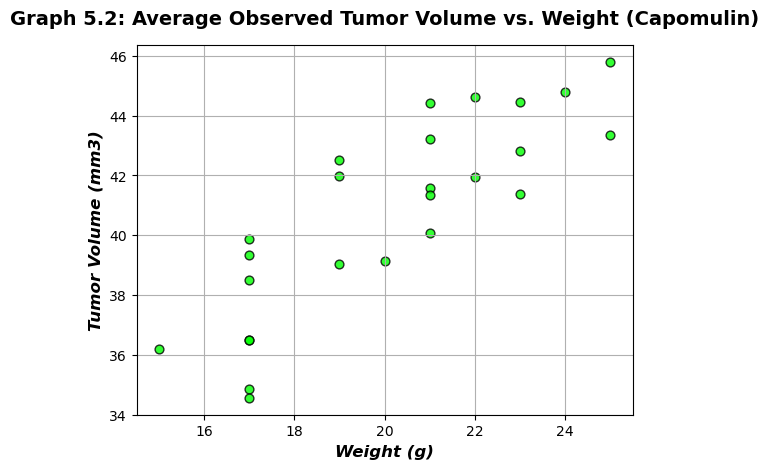

In [46]:
subroutine \
    .DisplayMatplotlibScatterPlotFromXYSeries \
        (capomulinMeanWeightPerMouseSeries, 
         capomulinMeanTumorVolumePerMouseSeries, 
         'Graph 5.2: Average Observed Tumor Volume vs. Weight (Capomulin)')

 # <br> **Section 6: Correlation and Regression**

### **Correlation Calculation and Display**

In [47]:
correlationFloatVariable \
    = function \
        .ReturnPearsonCorrelation \
            (capomulinMeanWeightPerMouseSeries, 
             capomulinMeanTumorVolumePerMouseSeries)

print \
    ('The correlation between mouse weight and the average tumor volume is ' 
     + '{:1.2f}.'.format(correlationFloatVariable))

The correlation between mouse weight and the average tumor volume is 0.84.


### **Display Scatter Plot With Regression**

r-value:     0.8419
r-squared:   0.7089
correlation: 0.8419


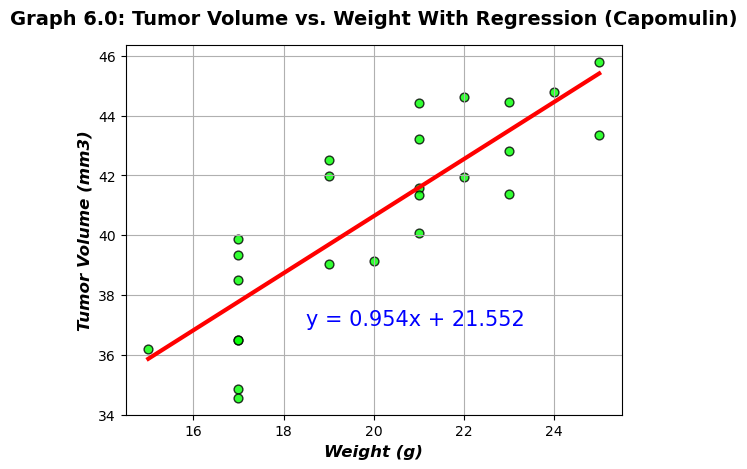

In [48]:
subroutine \
    .DisplayMatplotlibScatterPlotFromXYSeries \
        (capomulinMeanWeightPerMouseSeries, 
         capomulinMeanTumorVolumePerMouseSeries, 
         'Graph 6.0: Tumor Volume vs. Weight With Regression (Capomulin)',
         1, 18.5, 37)